# Measures of Randomness:
 - Shannon Information Content
 - Entropy
 - Diveregence
 - Mutual Information
 - Modeling Uncertainty

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext watermark

In [2]:
%watermark --author "Ryan Sloot |" -d -v

Ryan Sloot | 2016-10-08 

CPython 3.5.1
IPython 4.2.0


#### Shannon Information Content
$\qquad$For event $A$: $\ log_2\frac{1}{p(A)}$<br>
 - measure of information in bits, can be thought of as measure of how suprised by results: high number $=>$ 'suprised' by results, high information gained, low number meaning little or no information gained.
***
#### Entropy (Shannon Entropy)
$\qquad H(X) = \sum_{x\in X}p_X(x)\cdot log_2\frac{1}{p_X(x)}$
 - How random a distribution is
 - On average, how many bits will need to store for r.v. $X$
 - i.e. Compressing an already compressed file does not really do anything<br><br>
<strong>Key Idea:</strong><br>
More Random $\sim$ Less Predictable $\sim$ Less compressible

In [3]:
entropy = lambda p: np.sum(p * np.log2(1 / p))

In [4]:
## three loteries {amount gained: prob}
L1 = {-1: 999999/1000000, 9999: 1/1000000}
L2 = {-1: 999999/1000000, 999999: 1/1000000}
L3 = {-1: 9/10, 9: 1/10}

In [5]:
## compute entropy in bits for each Lottery
H_l1 = entropy(np.array([prob for prob in L1.values()]))
H_l2 = entropy(np.array([prob for prob in L2.values()]))
H_l3 = entropy(np.array([prob for prob in L3.values()]))
print('Entropies (in bits):\nL1: %.7f\nL2: %.7f\nL3: %.7f' % (H_l1,H_l2,H_l3))

Entropies (in bits):
L1: 0.0000214
L2: 0.0000214
L3: 0.4689956


For a random variable $X$ that takes on one of two values, one with probability $p$ and the other with probability $1−p$, plotting the entropy $H(p)$ as a function of $p$. 

C:\Users\Ryan\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\Ryan\AppData\Local\Continuum\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


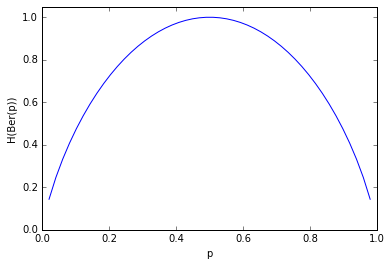

In [6]:
p_list = np.linspace(0, 1, 50)
hs = np.array([entropy(np.array([p, 1-p])) for p in p_list])
plt.plot(p_list, hs)

# max_point = plt.plot(p_list[np.argmax(hs)], hs.max(b), 'ro')
# plt.text(p_list[np.argmax(hs)], hs.max(), 
#          '   Max Entropy: %.7f\n   P: %.2f' % (hs.max(), p_list[np.argmax(hs)+1]))
plt.ylim(0,1.05)
plt.xlabel('p')
plt.ylabel('H(Ber(p))')
plt.show()

### Divergence
$\qquad D(p\parallel q) = \sum_x p(x)\cdot log_2\frac{1}{q(x)} - \sum_x p(x)\cdot log_2\frac{1}{p(x)}$<br>
$\qquad \qquad \ \ \ \ \ = \mathbb E_{X\sim P}[log_2\frac{p(x)}{q(x)}]$ <br>
 - Way to measure how two distributions are in terms of bits
 - <strong>Basic idea</strong>: Look at penalty we pay if we were to use a different distribution to encode a sample from distribution p.
 - Gibbs inequality property: $D(p\parallel q) = 0$ $iff$ $p==q$ for all $x$<br>
 In general, $D(p\parallel q) \neq D(q\parallel p)$

***
### Mutual Information
$\qquad I(X;Y) = D(p_{X,Y} \parallel p_Xp_Y)$<br>
 - For two discrete r.v.s $X$ and $Y$, the mutual information between $X$ and $Y$, denoted as $I(X;Y)$, measures how much information they share.
 - <strong>Basic Idea:</strong> how far $X$ and $Y$ are from being independent, since if they were independent $I(X;Y)=0$
 - If $X=Y$ we would expect $X$ and $Y$ to share most possible amount of information, and would get $I(X;Y)=D(p_{X,Y} || p_Xp_Y)=H(X)$$-$meaning if $X$ and $Y$ are the same, then the number of bits they share is exactly the average number needed to store $X$(or $Y$), $H(X)$ bits

In [7]:
## joint space
joint_prob_XY = np.array([[0.10, 0.09, 0.11], 
                          [0.08, 0.07, 0.07], 
                          [0.18, 0.13, 0.17]])

In [8]:
## Marginalize px and py
prob_X = joint_prob_XY.sum(axis=1)
prob_Y = joint_prob_XY.sum(axis=0)

In [9]:
## joint probability IF X and Y were independent
joint_prob_XY_indep = np.outer(prob_X, prob_Y)
joint_prob_XY_indep

array([[ 0.108 ,  0.087 ,  0.105 ],
       [ 0.0792,  0.0638,  0.077 ],
       [ 0.1728,  0.1392,  0.168 ]])

***
Mutual information of $X$ and $Y$ is given by divergences between $p_{X,Y}$ and $p_Xp_Y$:

$\qquad I(X;Y) = D(p_{X,Y}\parallel p_{X}p_{Y}) = \sum _ x \sum _ y p_{X, Y}(x, y) \log _2 \frac{p_{X, Y}(x, y)}{p_ X(x) p_ Y(y)}.$
<br><br>Divergence Generally:<br>
$\qquad D(p\parallel q)=\sum_x p(x) log_2 \frac{p(x)}{q(x)}$

In [10]:
info_divergence = lambda x,y: np.sum(x * np.log2(x/y))

In [11]:
mutual_info_XY = info_divergence(joint_prob_XY,
                                 joint_prob_XY_indep)
mutual_info_XY

0.0022610829960697087

***

Suppose we have three r.v.s $S,C,D$, where both $C$ and $D$ are dependent on $S$ we know:<br><br>
$\qquad p_{C\ |\ S}(c\ |\ s) = 1\ /\ (2s+1)$ for $c \in \{ 0,1,\ldots ,2s\}$<br><br>
and $D$ is $binom(q,S)$:<br><br>
$\qquad \begin{eqnarray}
        p_{D\ |\ S}(d\ |\ s) &= \begin{cases} {s \choose d}\, q^d\, (1-q)^{s-d} & d \in \{0,\ldots,s\} \\
                0 & \text{otherwise} \end{cases}
    \end{eqnarray}$

In [12]:
s = np.array([1,2,3,4])
p_S = [.25, .25, .25, .25]
cs = np.array([i for i in range(2*len(s))])
p_CS = np.zeros((len(cs),len(s)))
for i in range(len(s)):
    for c in cs:
        p_CS[c,i] = (1/(2*s[i]+1))
E_C_given_S=((p_CS*p_S).sum(axis=1)*cs).sum()
p_C = p_CS.sum(axis=1)
E_C = (p_C*cs).sum()

In [13]:
import scipy.stats
def pmf_DS (p,d): 
    s = [1,2,3,4]
    p_ds = []
    for i in s:
        p_ds.append(scipy.stats.binom(i,p).pmf(d))
    return np.array(p_ds)

In [14]:
pmf_DS(.2,1)

array([ 0.2   ,  0.32  ,  0.384 ,  0.4096])

#### Two Consecutive 6s
Expeceted number of rolls to see two consecutive 6s with a fair die

In [15]:
## Geometric dist
p = 1/6
one_six_expected = 1/p #E[X]=1/p
print('%d rolls to see one six' % one_six_expected)

6 rolls to see one six


so 6 rolls plus one additional roll: to get two consectutive, would give us 7 total per sequence; which would take on average one_six_expected, 6, to see again:<br>

In [16]:
consecutive_sixes = 1/p*(one_six_expected+1)
print('%.f rolls (on average) to see two consecutive sixes' % consecutive_sixes)

42 rolls (on average) to see two consecutive sixes


***
***
## Summary
Entropy and information divergence come up often in probabalistic modeling, especially when choosing maximum likelihood to decide which model to use. Information divergence will tell us how far a candidate model is from the observed data. Mutual information will help us figure out which r.v.s we should directly model pairwise interactions with$-$based on whether the information gained between the two is reason to include.